# importando os bibliotecas e arquivo

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import numpy as np

df = pd.read_csv('Samsung Dataset.csv')
display(df)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000
...,...,...,...,...,...,...,...
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.000000,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.000000,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.000000,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.000000,19246725


## Análise de Tendência (Trend Analysis):

- Use as colunas 'Date' e 'Close' para visualizar a tendência dos preços das ações ao longo do tempo. Isso pode ajudar a identificar padrões de crescimento ou declínio.


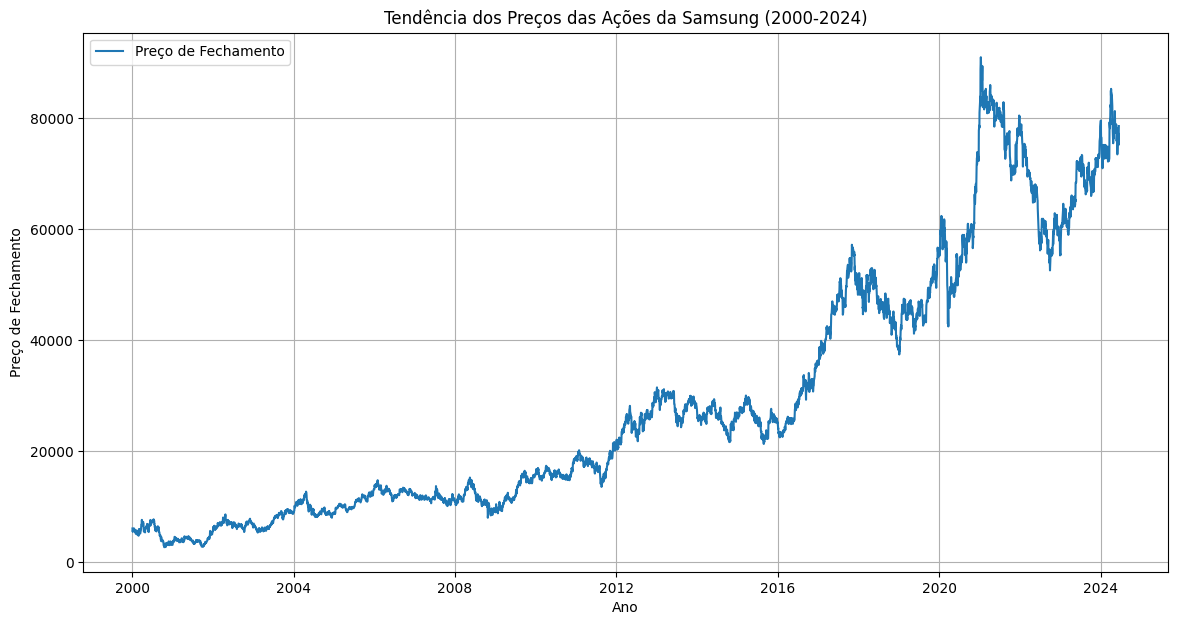

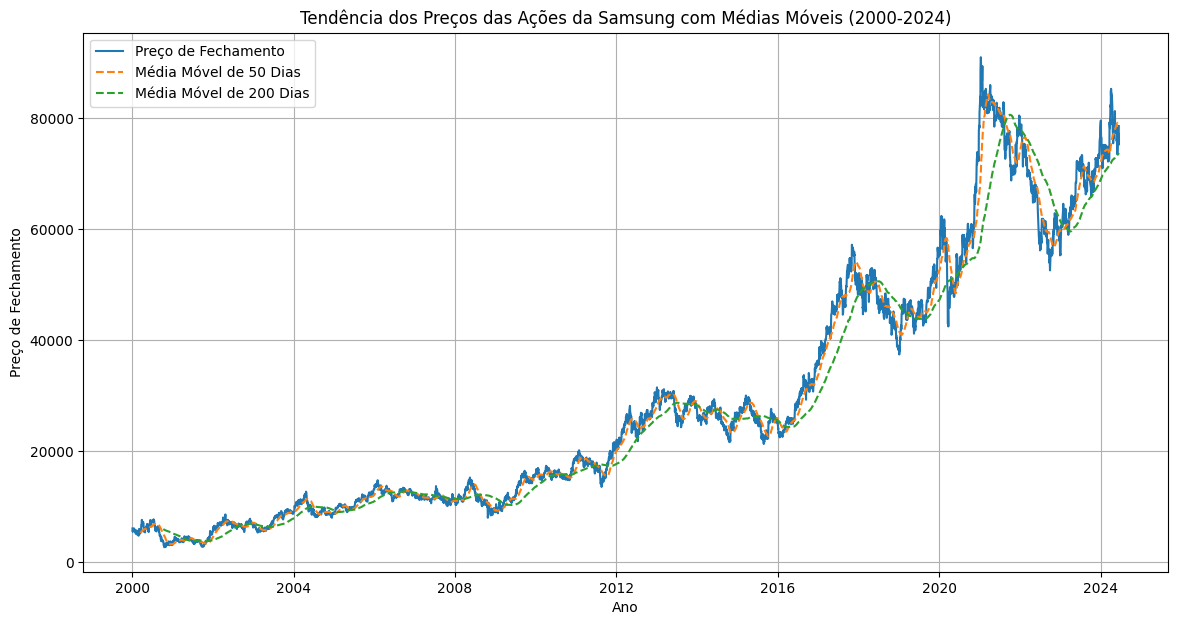

In [ ]:


# Converter a coluna 'Date' para o formato de data
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar o dataframe por data
df = df.sort_values('Date')

# Configurar a coluna 'Date' como índice
df.set_index('Date', inplace=True)

# Plotar o preço de fechamento ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Preço de Fechamento')
plt.title('Tendência dos Preços das Ações da Samsung (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Calcular médias móveis
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # Média Móvel de 50 dias
df['SMA_200'] = df['Close'].rolling(window=200).mean()  # Média Móvel de 200 dias

# Plotar médias móveis junto com o preço de fechamento
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Preço de Fechamento')
plt.plot(df['SMA_50'], label='Média Móvel de 50 Dias', linestyle='--')
plt.plot(df['SMA_200'], label='Média Móvel de 200 Dias', linestyle='--')
plt.title('Tendência dos Preços das Ações da Samsung com Médias Móveis (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()


## Volatilidade:

- Analisa a diferença entre os valores 'High' e 'Low' para medir a volatilidade diária. Altos níveis de volatilidade podem indicar períodos de instabilidade no mercado.

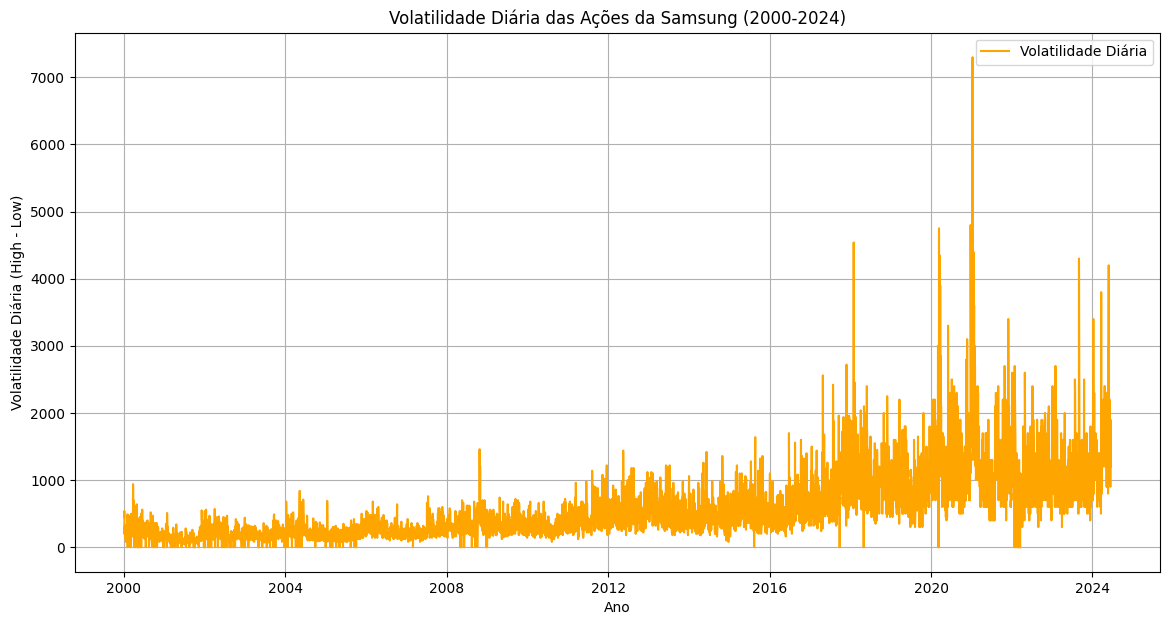

In [ ]:
# Calcular a volatilidade diária
df['Volatility'] = df['High'] - df['Low']

# Plotar a volatilidade diária ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df['Volatility'], label='Volatilidade Diária', color='orange')
plt.title('Volatilidade Diária das Ações da Samsung (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Volatilidade Diária (High - Low)')
plt.legend()
plt.grid(True)
plt.show()


## Volume de Negociação:

- Examinando a coluna 'Volume' para entender o interesse e a liquidez da ação em diferentes períodos. Grandes volumes podem indicar eventos significativos ou mudanças no mercado.

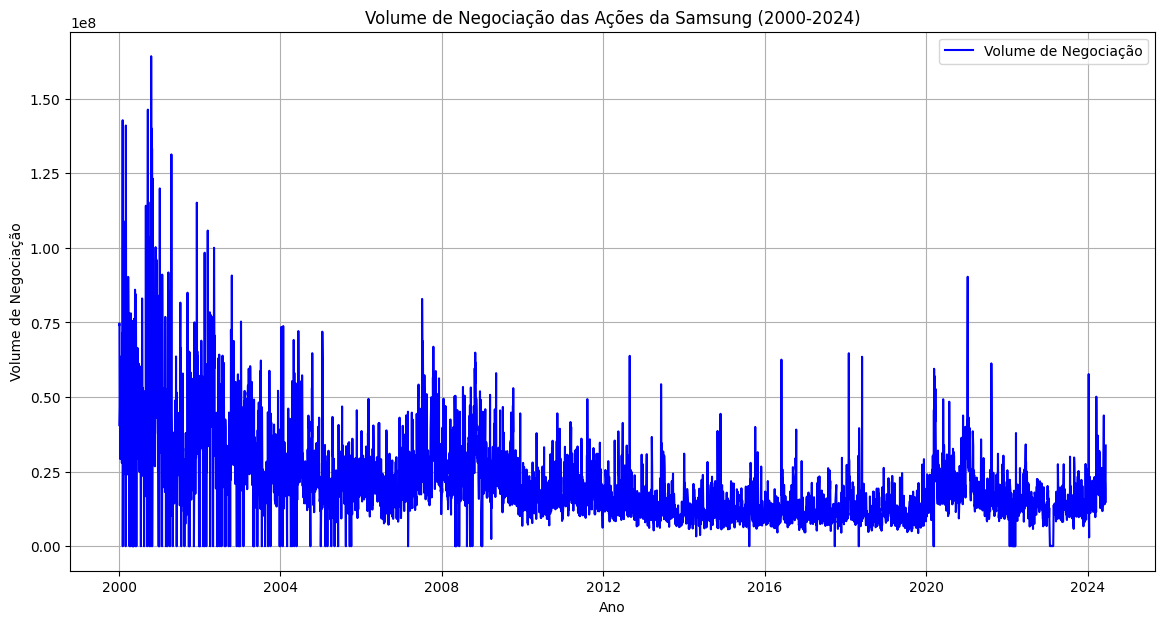

In [ ]:
# Plotar o volume de negociação ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume de Negociação', color='blue')
plt.title('Volume de Negociação das Ações da Samsung (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Volume de Negociação')
plt.legend()
plt.grid(True)
plt.show()


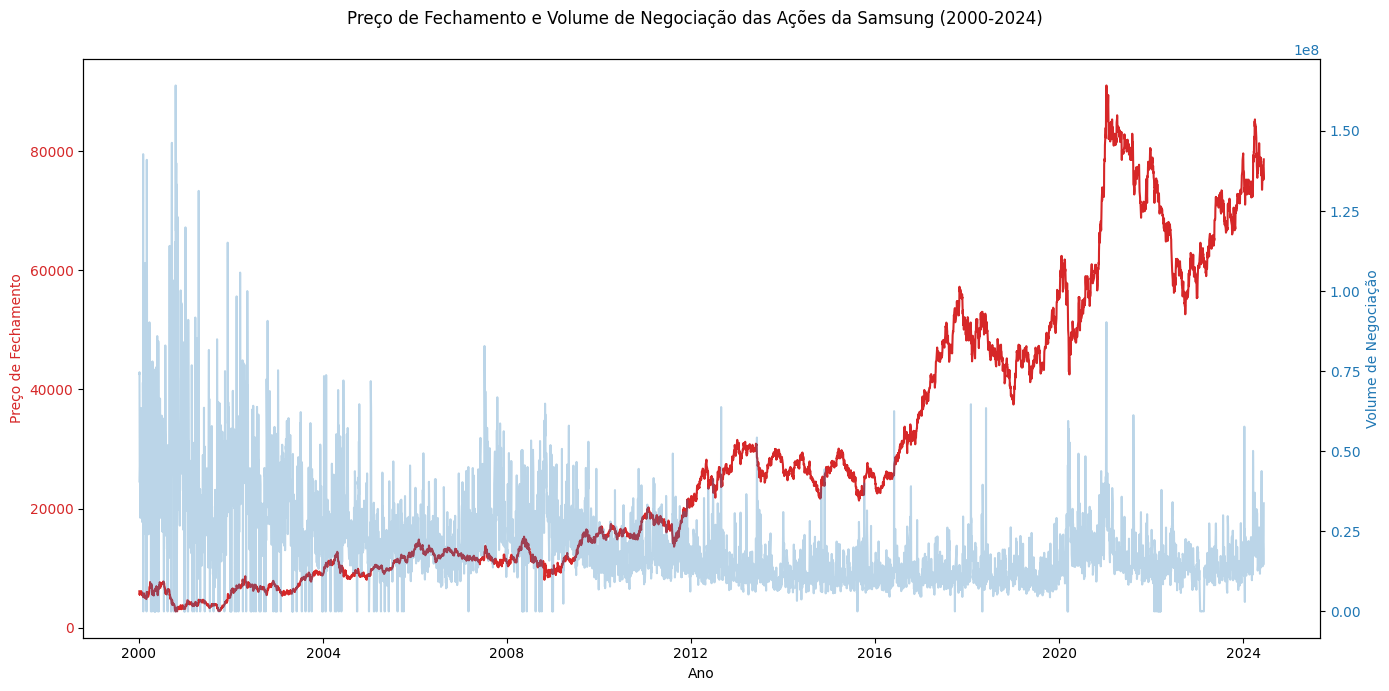

In [ ]:
# Plotar o preço de fechamento e o volume de negociação em subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico do preço de fechamento
ax1.set_xlabel('Ano')
ax1.set_ylabel('Preço de Fechamento', color='tab:red')
ax1.plot(df['Close'], label='Preço de Fechamento', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Criar um segundo eixo y para o volume de negociação
ax2 = ax1.twinx()
ax2.set_ylabel('Volume de Negociação', color='tab:blue')
ax2.plot(df['Volume'], label='Volume de Negociação', color='tab:blue', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Título e legendas
fig.suptitle('Preço de Fechamento e Volume de Negociação das Ações da Samsung (2000-2024)')
fig.tight_layout()
plt.show()


- O gráfico acima combina o preço de fechamento das ações e o volume de negociação em um único gráfico com dois eixos y. Isso permite uma análise conjunta das variações de preços e volumes de negociação, proporcionando uma visão mais abrangente do comportamento do mercado.


## Relação entre Volume e Preço:

- Correlação entre volume de negociação com as mudanças nos preços das ações (open, close, high, low) para entender como o volume afeta os preços.


Correlação entre Volume e Mudança de Preço (Open): 0.04
Correlação entre Volume e Mudança de Preço (Close): 0.05
Correlação entre Volume e Mudança de Preço (High): 0.13
Correlação entre Volume e Mudança de Preço (Low): -0.03


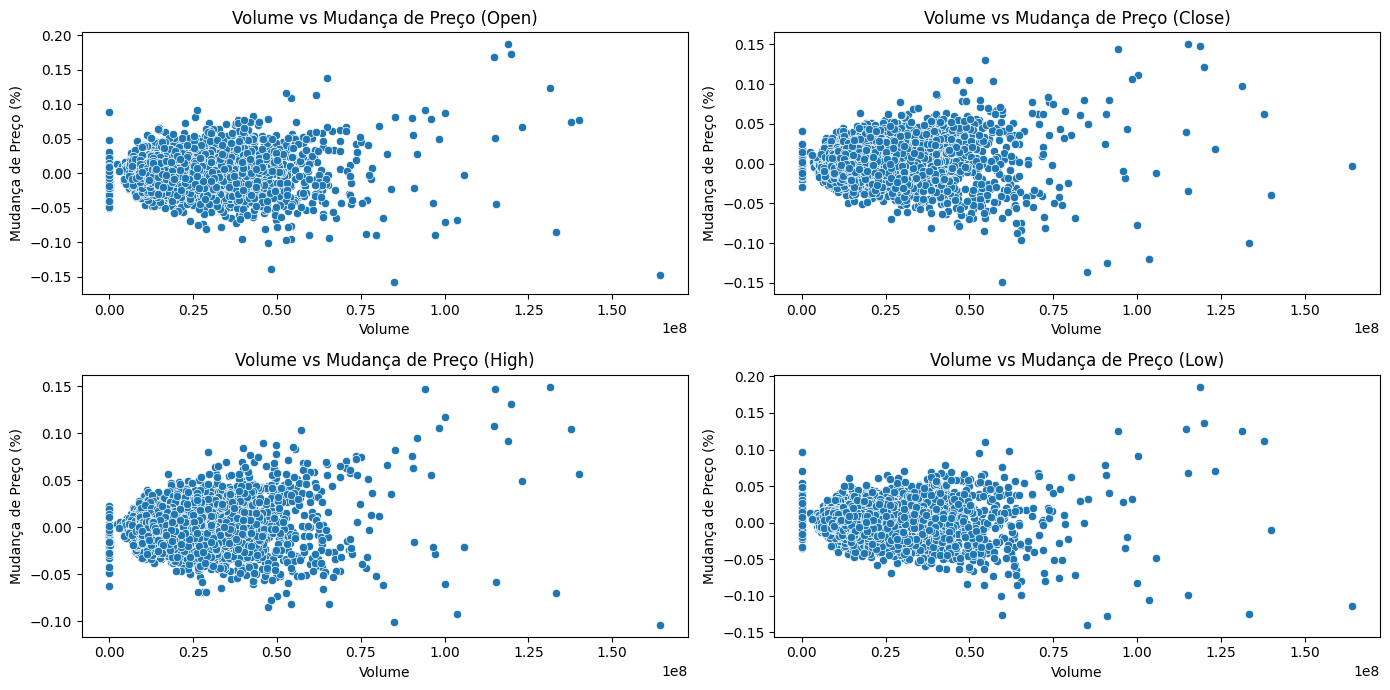

In [ ]:
# Calcular as variações percentuais diárias
df['Price_Change_Open'] = df['Open'].pct_change()
df['Price_Change_Close'] = df['Close'].pct_change()
df['Price_Change_High'] = df['High'].pct_change()
df['Price_Change_Low'] = df['Low'].pct_change()

# Remover as primeiras linhas com valores NaN resultantes da operação pct_change
df = df.dropna()

# Calcular a correlação entre volume e mudanças de preço
correlation_open = df['Volume'].corr(df['Price_Change_Open'])
correlation_close = df['Volume'].corr(df['Price_Change_Close'])
correlation_high = df['Volume'].corr(df['Price_Change_High'])
correlation_low = df['Volume'].corr(df['Price_Change_Low'])

# Imprimir as correlações
print(f"Correlação entre Volume e Mudança de Preço (Open): {correlation_open:.2f}")
print(f"Correlação entre Volume e Mudança de Preço (Close): {correlation_close:.2f}")
print(f"Correlação entre Volume e Mudança de Preço (High): {correlation_high:.2f}")
print(f"Correlação entre Volume e Mudança de Preço (Low): {correlation_low:.2f}")

# Visualizar a relação entre volume e mudanças de preço
plt.figure(figsize=(14, 7))

# Gráfico de dispersão para Preço de Abertura
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Volume'], y=df['Price_Change_Open'])
plt.title('Volume vs Mudança de Preço (Open)')
plt.xlabel('Volume')
plt.ylabel('Mudança de Preço (%)')

# Gráfico de dispersão para Preço de Fechamento
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Volume'], y=df['Price_Change_Close'])
plt.title('Volume vs Mudança de Preço (Close)')
plt.xlabel('Volume')
plt.ylabel('Mudança de Preço (%)')

# Gráfico de dispersão para Preço Máximo
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Volume'], y=df['Price_Change_High'])
plt.title('Volume vs Mudança de Preço (High)')
plt.xlabel('Volume')
plt.ylabel('Mudança de Preço (%)')

# Gráfico de dispersão para Preço Mínimo
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Volume'], y=df['Price_Change_Low'])
plt.title('Volume vs Mudança de Preço (Low)')
plt.xlabel('Volume')
plt.ylabel('Mudança de Preço (%)')

plt.tight_layout()
plt.show()


## Retornos Diários:

- Calculando os retornos diários, isso pode ajudar a entender a variabilidade dos retornos diários e medir a performance da ação.


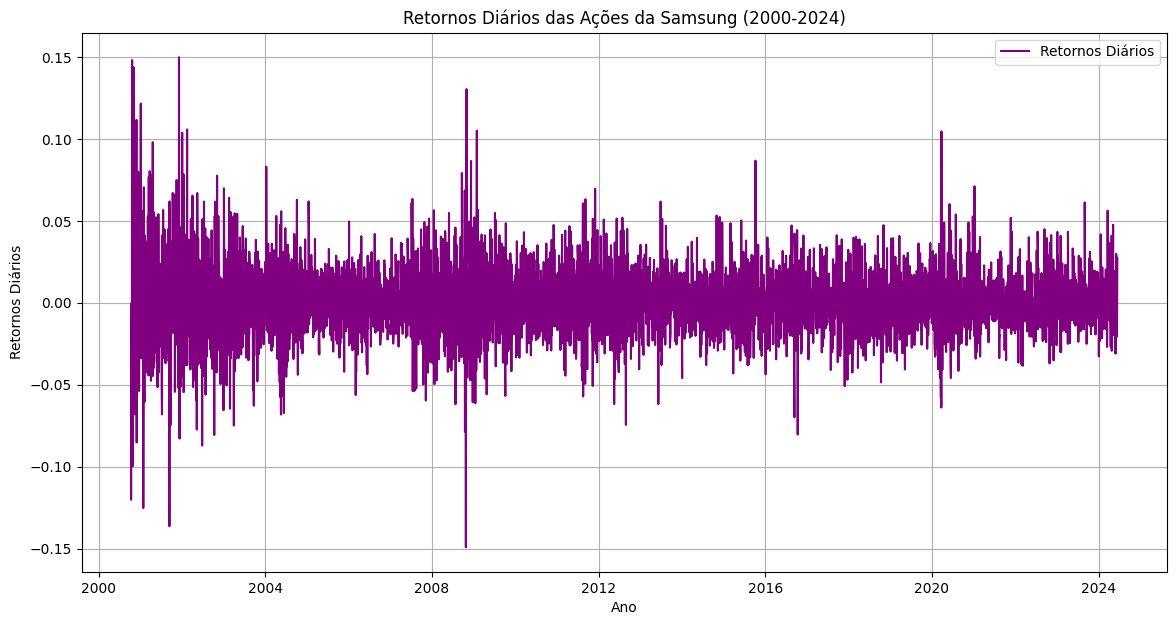

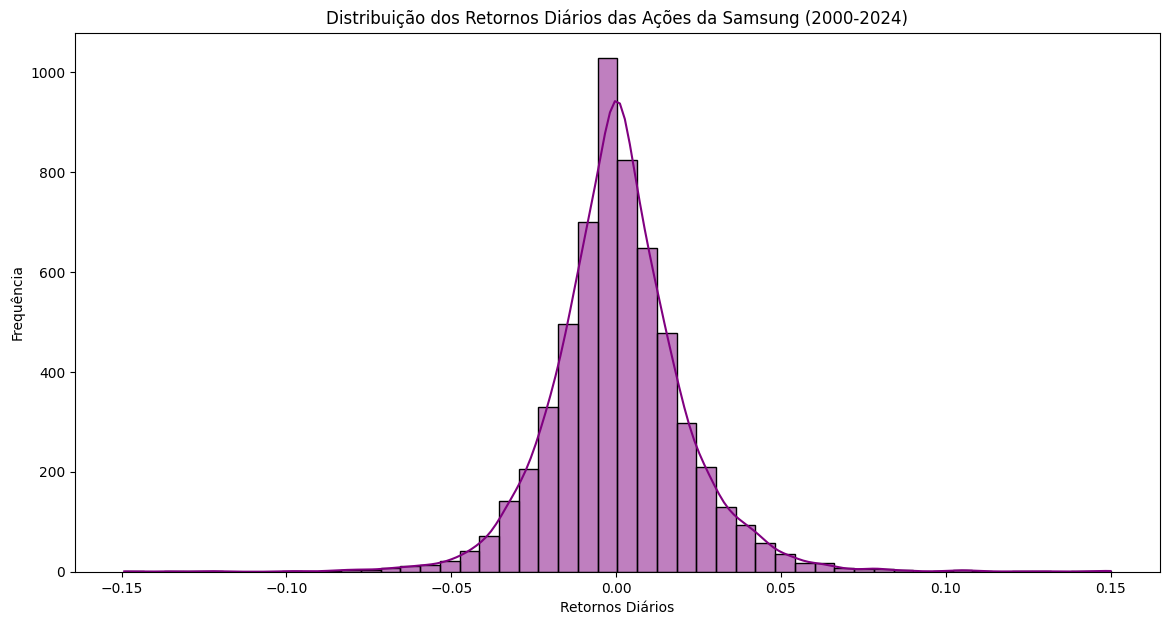

count    5927.000000
mean        0.000724
std         0.020440
min        -0.149206
25%        -0.010371
50%         0.000000
75%         0.011163
max         0.150000
Name: Daily_Return, dtype: float64


In [ ]:
# Calcular os retornos diários
df['Daily_Return'] = df['Close'].pct_change()

# Remover as primeiras linhas com valores NaN resultantes da operação pct_change
df = df.dropna()

# Plotar os retornos diários ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df['Daily_Return'], label='Retornos Diários', color='purple')
plt.title('Retornos Diários das Ações da Samsung (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Retornos Diários')
plt.legend()
plt.grid(True)
plt.show()

# Histograma dos retornos diários
plt.figure(figsize=(14, 7))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='purple')
plt.title('Distribuição dos Retornos Diários das Ações da Samsung (2000-2024)')
plt.xlabel('Retornos Diários')
plt.ylabel('Frequência')
plt.show()

# Estatísticas descritivas dos retornos diários
statistics = df['Daily_Return'].describe()
print(statistics)


## Análise Técnica:

Usa como indicadores técnicos RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), e Bollinger Bands para prever movimentos futuros de preços.

### Cálculo dos Indicadores Técnicos:

- RSI (Relative Strength Index): Calcula o RSI com um período de 14 dias. Valores acima de 70 podem indicar que a ação está sobrecomprada e valores abaixo de 30 podem indicar que a ação está sobrevendida.

- MACD (Moving Average Convergence Divergence): Calcula o MACD, a linha de sinal do MACD e o histograma do MACD com os períodos padrão. Quando o MACD cruza acima da linha de sinal, pode ser um sinal de compra e quando o MACD cruza abaixo da linha de sinal, pode ser um sinal de venda.

- Bollinger Bands: Calcula as Bollinger Bands com um período de 20 dias e desvios padrão de 2.Quando os preços estão perto da banda superior, a ação pode estar sobrecomprada e quando os preços estão perto da banda inferior, a ação pode estar sobrevendida.


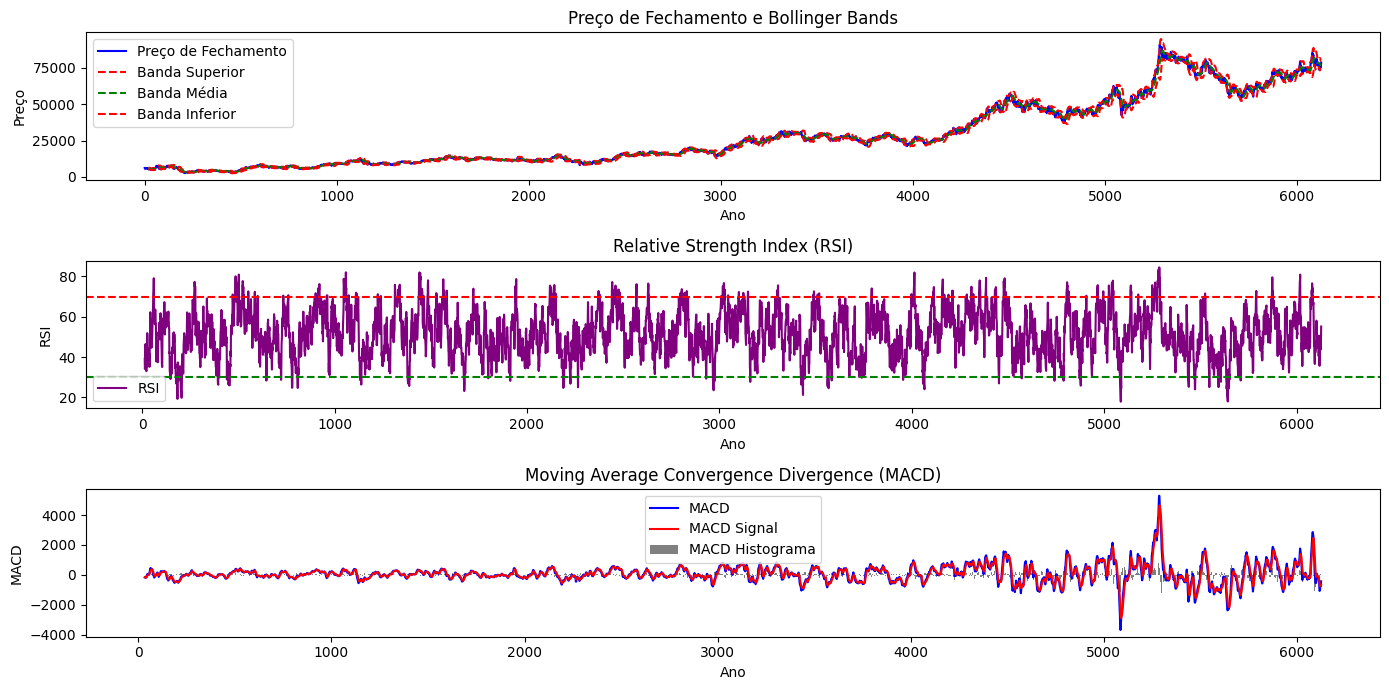

In [8]:
# Calcular o RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calcular o MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calcular as Bollinger Bands
df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Plotar os preços de fechamento e os indicadores técnicos
plt.figure(figsize=(14, 7))

# Preços de fechamento e Bollinger Bands
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Preço de Fechamento', color='blue')
plt.plot(df['Upper_Band'], label='Banda Superior', linestyle='--', color='red')
plt.plot(df['Middle_Band'], label='Banda Média', linestyle='--', color='green')
plt.plot(df['Lower_Band'], label='Banda Inferior', linestyle='--', color='red')
plt.title('Preço de Fechamento e Bollinger Bands')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Ano')
plt.ylabel('RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histograma', color='grey')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Ano')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()


## Simulação de Carteira:

- Utilizando o histórico de preços para simular estratégias de investimento, como compra e venda em diferentes datas, para avaliar potenciais retornos de investimento.


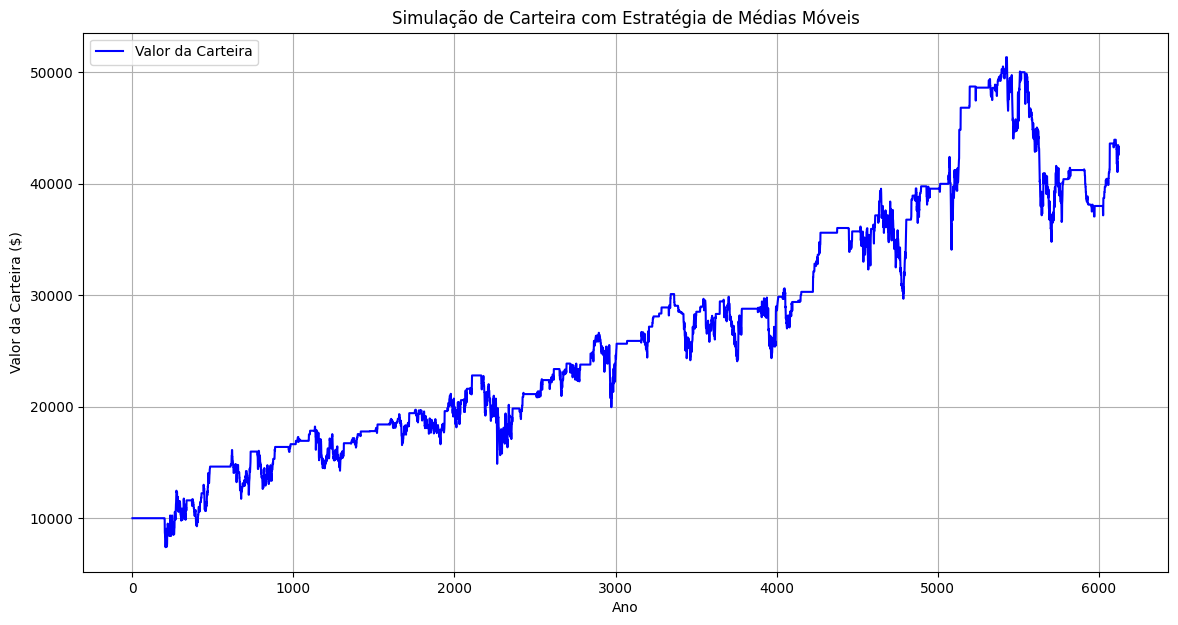

Retorno Total da Carteira: 332.83%
Retorno Total Buy-and-Hold: 1186.42%


In [13]:
# Calcular médias móveis
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Definir capital inicial e posição
initial_capital = 10000.0
position = 0
cash = initial_capital
portfolio_value = []

# Simulação da estratégia
for i in range(len(df)):
    if np.isnan(df['SMA_50'].iloc[i]) or np.isnan(df['SMA_200'].iloc[i]):
        portfolio_value.append(cash)
        continue
    
    # Estratégia de compra e venda
    if df['Close'].iloc[i] < df['SMA_50'].iloc[i] and cash > 0:
        # Comprar ações
        position = cash / df['Close'].iloc[i]
        cash = 0
    elif df['Close'].iloc[i] > df['SMA_200'].iloc[i] and position > 0:
        # Vender ações
        cash = position * df['Close'].iloc[i]
        position = 0
    
    # Calcular o valor da carteira
    if position > 0:
        portfolio_value.append(position * df['Close'].iloc[i])
    else:
        portfolio_value.append(cash)

# Adicionar valor da carteira ao dataframe
df['Portfolio_Value'] = portfolio_value

# Plotar o valor da carteira ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(df['Portfolio_Value'], label='Valor da Carteira', color='blue')
plt.title('Simulação de Carteira com Estratégia de Médias Móveis')
plt.xlabel('Ano')
plt.ylabel('Valor da Carteira ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular o retorno da carteira
final_portfolio_value = df['Portfolio_Value'].iloc[-1]
total_return = (final_portfolio_value - initial_capital) / initial_capital
print(f'Retorno Total da Carteira: {total_return:.2%}')

# Comparar com a estratégia de buy-and-hold
buy_and_hold_return = (df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]
print(f'Retorno Total Buy-and-Hold: {buy_and_hold_return:.2%}')
